 # Our goal is to automatically clasify events on the Sun.

## We will focus on data from NASA/SDO (Solar Dynamic Observatory)

![alt text](https://www.thesuntoday.org/wp-content/gallery/sdo/sun_wavelength_chart_2k_final.jpg)

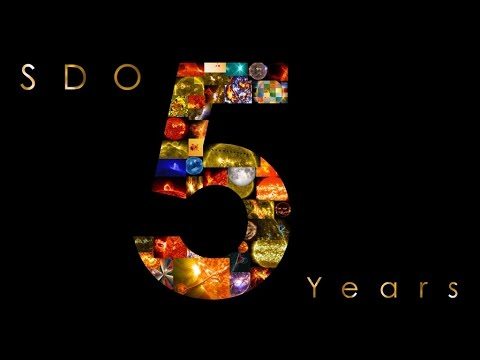

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('GSVv40M2aks', width=800, height=450)

### -> FEATURES: SDO images of the Sun
### -> LABELS: Labeled data of active regions


![alt text](https://www.researchgate.net/profile/Ahmet_Kucuk4/publication/317570870/figure/fig4/AS:671979522781188@1537223811916/Example-of-solar-event-classification-using-deep-convolutional-neural-networks.png)

More info are available here: https://link.springer.com/chapter/10.1007/978-3-319-59063-9_11

## Data sources:

1.   Directly from SDO web page: https://sdo.gsfc.nasa.gov/data/
2.   Helioviewer: https://helioviewer.org/
3.   Complet dataset can be downloaded from: http://lsdo.dmlab.cs.gsu.edu/data.html


In [0]:
# mount the Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# set the root path
root_path = 'gdrive/My Drive/SPACE-ML/SPACE-LAB_summer_school/SLSS_2019/presentations/Wednesday/'
print(root_path)

gdrive/My Drive/SPACE-ML/SPACE-LAB_summer_school/SLSS_2019/presentations/Wednesday/


In [0]:
# install the packages that are not default in Google Colab
!pip install sunpy[net]
!pip install glymur

     |████████████████████████████████| 6.8MB 7.3MB/s 
     |████████████████████████████████| 102kB 9.6MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 1.2MB 42.7MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 256kB 49.1MB/s 
     |████████████████████████████████| 153kB 49.6MB/s 
  Created wheel for parfive: filename=parfive-1.0.0-cp36-none-any.whl size=12218 sha256=15c3b1a3709972f0f4e8b8ead143ecd27e8d33c62ce758abdba554888a71ed1f
  Stored in directory: /root/.cache/pip/wheels/b0/f6/1e/59105ec530148b9e1230d21493efef1c7def128ebfb34a7782
  Created wheel for drms: filename=drms-0.5.7-py2.py3-none-any.whl size=33828 sha256=7d09e2fe4634472c5cb275cd9703b8c8c8458038ccef2a994b33aa12a46119b3
  Stored in directory: /root/.cache/pip/wheels/29/e4/fc/9f890fa6d657b75b19fe91ab72eb7ee9609bfcdc1dc862418a
  Created wheel for idna-ssl: filename=idna

In [0]:
# install the the specific version of astropy
!pip install astropy

In [0]:
# import the libraries
import sunpy.io.jp2 as io
import sunpy.map
import matplotlib.pyplot as plt

In [0]:

# read the example data from my Google Drive
img1 = io.read(root_path + '2013_01_01__01_01_35_34__SDO_AIA_AIA_171.jp2')
img1

[HDPair(data=array([[  0,   2,   0, ...,   0,   0,   0],
       [252,   1,   2, ...,   0,   0,   0],
       [  0,   0,   1, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), header=FileHeader([('SIMPLE', 1), ('BITPIX', 16), ('NAXIS', 2), ('NAXIS1', 4096), ('NAXIS2', 4096), ('EXTEND', 1), ('DATE_OBS', '2013-01-01T01:01:35.34'), ('ORIGIN', 'SDO'), ('DATE', '2013-01-01T01:11:13'), ('TELESCOP', 'SDO'), ('INSTRUME', 'AIA_3'), ('DATE-OBS', '2013-01-01T01:01:35.34'), ('T_OBS', '2013-01-01T01:01:36.34Z'), ('TOBSSTEP', 1.0), ('TOBSEPOC', '1977.01.01_00:00:00_TAI'), ('CAMERA', 3), ('IMG_TYPE', 'LIGHT'), ('EXPTIME', 2.000163), ('EXPSDEV', 0.000133), ('INT_TIME', 2.273438), ('WAVELNTH', 171), ('WAVEUNIT', 'angstrom'), ('WAVE_STR', '171_THIN'), ('FSN', 60051809), ('FID', 0), ('LVL_NUM', 1.5), ('QUALLEV0', 0), ('QUALITY', 1073741824), ('TOTVALS', 16777216), ('DATAVALS', 1

In [0]:
# convert the data to "Map" this is primary data type in SunPy
aia1 = sunpy.map.Map(img1)
aia1

/usr/local/lib/python3.6/dist-packages/sunpy/map/mapbase.py:277: UserWarning: Unable to treat `.meta` as a FITS header, assuming a simple WCS.
  warnings.warn("Unable to treat `.meta` as a FITS header, assuming a simple WCS.")
/usr/local/lib/python3.6/dist-packages/sunpy/map/mapbase.py:277: UserWarning: Unable to treat `.meta` as a FITS header, assuming a simple WCS.
  warnings.warn("Unable to treat `.meta` as a FITS header, assuming a simple WCS.")
/usr/local/lib/python3.6/dist-packages/sunpy/map/mapbase.py:277: UserWarning: Unable to treat `.meta` as a FITS header, assuming a simple WCS.
  warnings.warn("Unable to treat `.meta` as a FITS header, assuming a simple WCS.")
/usr/local/lib/python3.6/dist-packages/sunpy/map/mapbase.py:277: UserWarning: Unable to treat `.meta` as a FITS header, assuming a simple WCS.
  warnings.warn("Unable to treat `.meta` as a FITS header, assuming a simple WCS.")


SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 3
Detector:		 AIA
Measurement:		 171.0 Angstrom
Wavelength:		 171.0 Angstrom
Observation Date:	 2013-01-01 01:01:35
Exposure Time:		 2.000163 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.6 0.6] arcsec / pix
Reference Pixel:	 [2048.5 2048.5] pix
Reference Coord:	 [0. 0.] arcsec
array([[  0,   2,   0, ...,   0,   0,   0],
       [252,   1,   2, ...,   0,   0,   0],
       [  0,   0,   1, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

/usr/local/lib/python3.6/dist-packages/sunpy/map/mapbase.py:277: UserWarning: Unable to treat `.meta` as a FITS header, assuming a simple WCS.
  warnings.warn("Unable to treat `.meta` as a FITS header, assuming a simple WCS.")


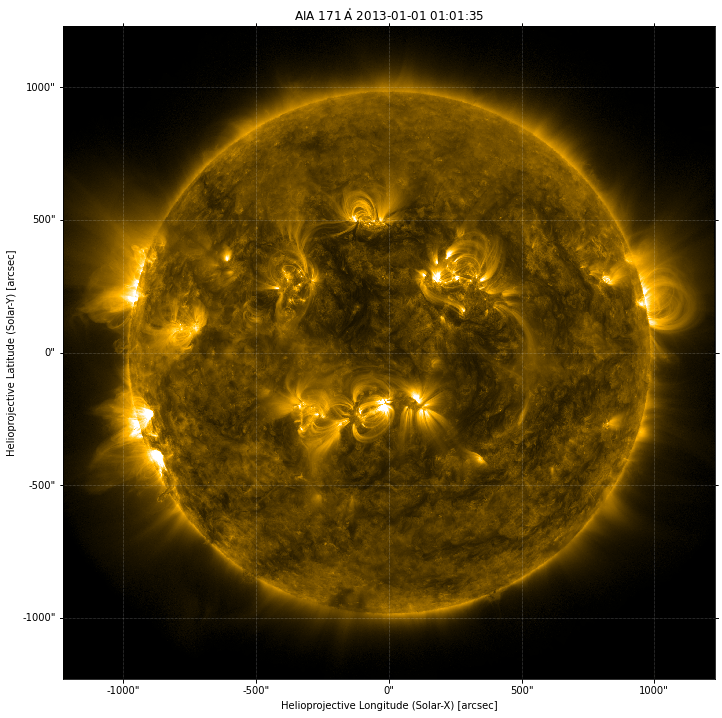

In [0]:
# plot the image of the Map
plt.figure(figsize=(12, 12))
aia1.plot()
#aia1.draw_limb()

In [0]:
# another posibility is to download the Image directly from Helioviewer
!pip install zeep
!pip install drms
from sunpy.map import Map
from sunpy.net.helioviewer import HelioviewerClient
hv = HelioviewerClient()  
file = hv.download_jp2('2012/01/01', observatory="SDO", instrument="AIA", measurement="171")
aia2 = Map(file) 

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]
2012_01_01__00_00_12_34__SDO_AIA_AIA_171.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]
2012_01_01__00_00_12_34__SDO_AIA_AIA_171.jp2:   3%|▎         | 32.9k/1.08M [00:00<00:05, 207kB/s]
2012_01_01__00_00_12_34__SDO_AIA_AIA_171.jp2:  20%|█▉        | 213k/1.08M [00:00<00:03, 274kB/s] 
2012_01_01__00_00_12_34__SDO_AIA_AIA_171.jp2:  71%|███████   | 765k/1.08M [00:00<00:00, 383kB/s]
Files Downloaded: 100%|██████████| 1/1 [00:01<00:00,  1.07s/file]


/usr/local/lib/python3.6/dist-packages/sunpy/map/mapbase.py:277: UserWarning: Unable to treat `.meta` as a FITS header, assuming a simple WCS.
  warnings.warn("Unable to treat `.meta` as a FITS header, assuming a simple WCS.")


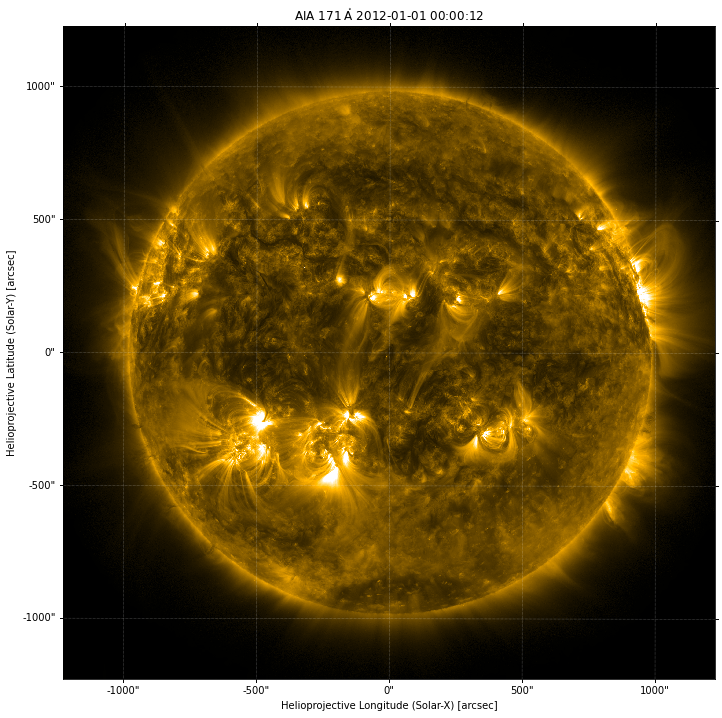

In [0]:
# plot the image
plt.figure(figsize=(12, 12)) 
aia2.plot()  

### Other resources:

*   https://ml-helio.github.io/talks/illarionov.pdf
*   https://www.lmsal.com/hek/
*   https://www.researchgate.net/publication/301902087_A_large-scale_dataset_of_solar_event_reports_from_automated_feature_recognition_modules


